# Import Needed Libraries

In [2]:
!pip install langdetect
!pip install sklearn
!pip install matplotlib
!pip install seaborn

     |████████████████████████████████| 981 kB 8.7 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=6b15131321a3b9a511e61689af6b8dbf6dfd5b698dd0d120bd76b5b1a75ab69e
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [3]:
%pylab inline
%matplotlib inline

# Data Analysis lib imports
import pandas as pd
import numpy as np

# ML libs imports
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge ,RidgeCV , LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score ,KFold ,GridSearchCV
from sklearn.pipeline import make_pipeline , Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import re
from sklearn.preprocessing import StandardScaler, MinMaxScaler,PolynomialFeatures

# Visual libs imports
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

# Language detection lib import
from langdetect import detect

from mlxtend.plotting import plot_confusion_matrix

Populating the interactive namespace from numpy and matplotlib


# Helper Function

In [4]:
def plot_confu(conf_matrix):
  fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Blues)
  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()


def matrixesCalculation(y_true, y_pred):

  print('-------------------------------------')
  precision = metrics.precision_score(y_true, y_pred, average='binary')
  print('- Precision: %.3f' % precision)


  recall = metrics.recall_score(y_true, y_pred, average='binary')
  print('- Recall: %.3f' % recall)


  f1 = metrics.f1_score(y_true, y_pred, average='binary')
  print('- f1: %.3f' % f1)

 

  accuracy = metrics.accuracy_score(y_true, y_pred)
  print('- Accuracy: %.3f' % accuracy)
  print(" ")
  print(" ")
  print(" ")
  confusion_matrix = metrics.confusion_matrix(y_true, y_pred)
  plot_confu(confusion_matrix)

  print('-------------------------------------')

# Reading file

In [7]:
df = pd.read_excel("just_en_udemy_data.xlsx")
df = df.drop("Unnamed: 0",axis = 1)
df = df[df['langue'] == "en"]

# MVP
- Basemodel 
- plot for y and y_predict for train and val sets with Basemodel

## Beasline Model

In [9]:
X= df[['Num_lectures','Rating','Views']].values
Y= df['isBestSaller'].values

X_train_beas, X_test_beas, Y_train_beas, Y_test_beas= train_test_split(X,Y, test_size=0.2)
X_train_beas, X_val_beas, Y_train_beas, Y_val_beas= train_test_split(X_train_beas,Y_train_beas, test_size=0.25)

In [10]:
nb = BernoulliNB()
nb.fit(X_train_beas,Y_train_beas)
nb.score(X_val_beas,Y_val_beas)

0.85023457235655

## Baseline Preformence Plots

-------------------------------------
- Precision: 0.000
- Recall: 0.000
- f1: 0.000
- Accuracy: 0.862
 
 
 


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



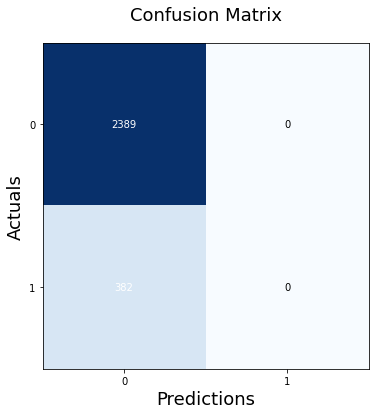

-------------------------------------


In [11]:
matrixesCalculation(Y_test_beas, nb.predict(X_test_beas))